<a href="https://colab.research.google.com/github/vis-hal-k/Data_science_self-Practice/blob/main/Coursera_course/%23C2-Convolutional_Neural_Network/Week-1_material/Lab1_cats_vc_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# usining more sophisticated image with CNN

In course 1 of this specialization, yo saw how to use a CNN to make your recognition of computer generated images of horses and humans more efficient. In this lesson, you'll take that to the next level: building a model to calssify real imagesof cats and dogs. Like the horses and humans dataset, real-world images also came in different shapes, aspect ratios, etc. and you will  need to take this into account when preparing your data.

In this lab, you will first review how to build CNNs, prepare your data with `ImageDataGenerator` and examine your reuslts. You will follow these steps:
1. Explore the example data of Dogs vs Cats
2. Build and train a neural network to classify between the two pets
3. Evaulate the training and validation accuracy

You will build upon your result here in the next labs so you can improve it, by avoiding `overfitting`. Let's begin

In [1]:
# Download and Inspect the Dataset
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

# This is a .zip of 2000 jpg pic of cats and dogs. Is is a subst of the `Dogs vs.Cats datset` contains 25,000 images.

--2023-07-01 07:35:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   123MB/s    in 0.5s    

2023-07-01 07:35:36 (123 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile
# unzip the archive
local_zip = "/content/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall()
zip_ref.close()

The contents of the .zip are extracted to the base directory `./cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (you can ignore `vectorize.py` in the output in the next cell).

If you recall, the **training set** is the data that is used to tell the neural network model that 'this is what a cat looks like' and 'this is what a dog looks like'. The **validation set** is images of cats and dogs that the neural network will not see as part of the training. You can use this to test how well or how badly it does in evaluating if an image contains a cat or a dog. (See the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) if you want a refresher on training, validation, and test sets.)

These subdirectories in turn each contain `cats` and `dogs` subdirectories.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import os
base_dir = 'cats_and_dogs_filtered'

print("Content of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory\n")
print(os.listdir(f'{base_dir}/train' ))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Content of base directory:
['vectorize.py', 'train', 'validation']

Contents of train directory

['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


You can assign each of these directories to a varibale so you can use it later

In [5]:
import os
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

train_cats_dir = os.path.join(train_dir , 'cats')
train_dogs_dir = os.path.join(train_dir , 'dogs')

validation_cats_dir = os.path.join(validation_dir , 'cats')
validation_dogs_dir = os.path.join(validation_dir , 'dogs')

Now see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the name in the `validation` directory):

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.616.jpg', 'cat.193.jpg', 'cat.488.jpg', 'cat.733.jpg', 'cat.53.jpg', 'cat.71.jpg', 'cat.574.jpg', 'cat.873.jpg', 'cat.604.jpg', 'cat.702.jpg']
['dog.707.jpg', 'dog.189.jpg', 'dog.736.jpg', 'dog.421.jpg', 'dog.878.jpg', 'dog.829.jpg', 'dog.95.jpg', 'dog.566.jpg', 'dog.395.jpg', 'dog.729.jpg']


In [7]:
# find out the total number of cat and dog images in the train and validation directories
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


For both cats & dogs, you have 1,000 training images and 500 validation images.

Now take a look at a few pictures to get a better sense of what the cats and dogs datasets look like. First, configure the `matplotlib` parameters:

In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows=4
ncols=4
pic_index = 0

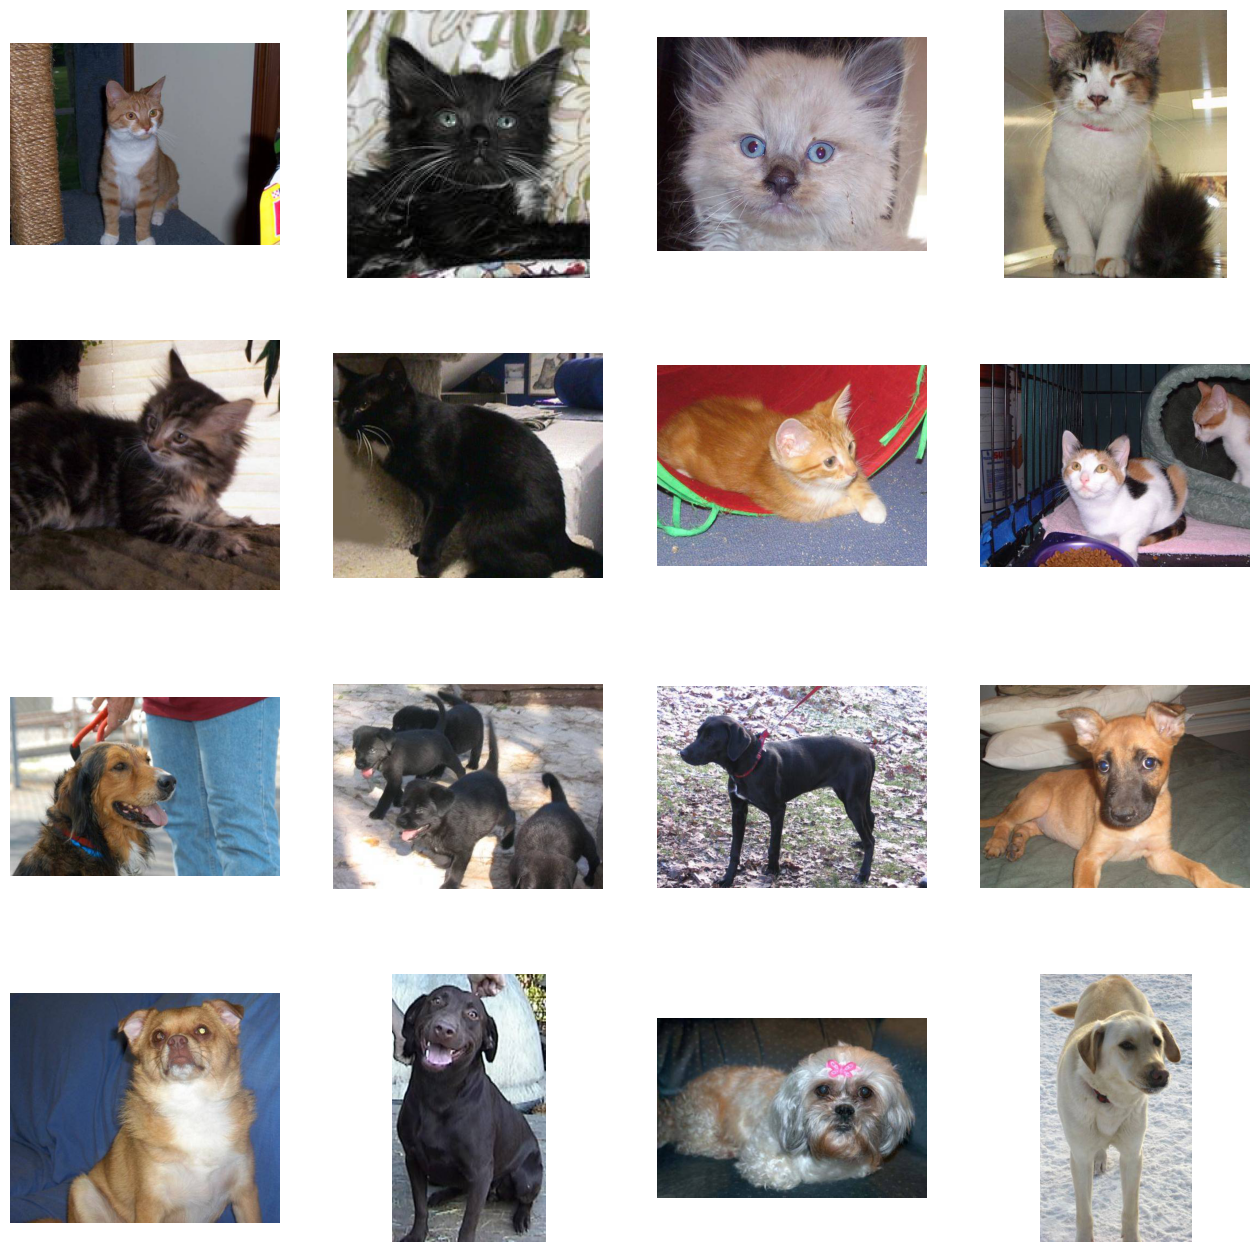

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


It may not be obvious from looking at the images in this grid but an important note here is that these images come in all shapes and sizes (just like the 'horses or humans' dataset). So before training a neural network with them, you'll need to tweak the images. You'll see that in the next sections.

## Building a Small Model from Scratch to get to ~72% Accuracy

To train a neural network to handle the images, you'll need them to be in a uniform size. You will choose 150x150 pixels for this, and you'll see the code that preprocesses the images to that shape shortly.

You can define the model by importing Tensorflow and using the Keras API. Here is the entire code first then the discussion comes after. This is very similar to the models you have built in Course 1.


In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
from keras.optimizers import RMSprop
model.compile(
    optimizer = RMSprop(learning_rate = 0.001) ,
    loss='binary_crossentropy' ,
    metrics = ['accuracy']
)

## Data Preprocessing
Next step is to set up the data generator that will read pictures in the source folders, convert them the `float32` tensors, and feed them (with theor labels) to the model. You'll have one generator for the training images and one for the validation images.These generators will yield batches of images of size 150x150 and their labels (binary)

As you may alredy know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network(i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel vbalues to be in the `[0,1]` range (originally all values are in the `[o,255]` range).

In keras, this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the rescale parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data,labels)` or `.flow_from_directory(directory)`

In [15]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen  = ImageDataGenerator(rescale = 1./255.)
test_datagen  = ImageDataGenerator(rescale = 1./255.)


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory( train_dir ,
                                                    batch_size = 20 ,
                                                     class_mode = 'binary' ,
                                                     target_size = (150,150)
                                                     )

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir ,
                                                        batch_size = 20,
                                                        class_mode='binary',
                                                        target_size = (150,150)
                                                        )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Training
You will now train on all 2,000 images available, for 15 epochs, and monitor the accuracy as well on the 1,000 images in the validation set.

Do note the values per epoch.

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy.

The `loss` and `accuracy` are great indicators of progress in training. `loss` measures the current model prediction against the known labels, calculating the result. `accuracy`, on the other hand, is the portion of correct guesses.


In [16]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
100/100 - 10s - loss: 0.0586 - accuracy: 0.9875 - val_loss: 1.4195 - val_accuracy: 0.7470 - 10s/epoch - 100ms/step
Epoch 2/15
100/100 - 10s - loss: 0.0241 - accuracy: 0.9925 - val_loss: 1.7981 - val_accuracy: 0.7290 - 10s/epoch - 97ms/step
Epoch 3/15
100/100 - 10s - loss: 0.0453 - accuracy: 0.9865 - val_loss: 1.7043 - val_accuracy: 0.7150 - 10s/epoch - 97ms/step
Epoch 4/15
100/100 - 11s - loss: 0.0157 - accuracy: 0.9945 - val_loss: 1.9387 - val_accuracy: 0.7160 - 11s/epoch - 106ms/step
Epoch 5/15
100/100 - 13s - loss: 0.0289 - accuracy: 0.9930 - val_loss: 1.9799 - val_accuracy: 0.7140 - 13s/epoch - 130ms/step
Epoch 6/15
100/100 - 16s - loss: 0.0157 - accuracy: 0.9960 - val_loss: 1.8729 - val_accuracy: 0.7450 - 16s/epoch - 161ms/step
Epoch 7/15
100/100 - 13s - loss: 0.1330 - accuracy: 0.9845 - val_loss: 1.8340 - val_accuracy: 0.7320 - 13s/epoch - 132ms/step
Epoch 8/15
100/100 - 13s - loss: 0.0108 - accuracy: 0.9960 - val_loss: 1.8787 - val_accuracy: 0.7410 - 13s/epoch - 131ms

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a cat or a dog.

_**Note:** Old versions of the Safari browser might have compatibility issues with the code block below. If you get an error after you select the images(s) to upload, you can consider updating your browser to the latest version. If not possible, please comment out or skip the code block below, uncomment the next code block and run it._

In [ ]:
import numpy as np
import tensorflow as tf

from google.colab import files
from keras.utils import load_img , img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' +fn
  img = load_img(path, target_size = (150,150))

  x = img_to_array(img)
  x=x/255.0
  x = np.expand_dims(x , axis = 0)
  images = np.vstack([x])

  classes = model.predict(images , batch_size = 10)
  print(classes[0])

  if classes[0] > 0.5:
    print(fn + "is a dog")
  else:
    print(fn + "is a cat")

### Visualizing Intermediate Representations

To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 0s 107ms/step


<ipython-input-19-ef37dc9124ee>:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


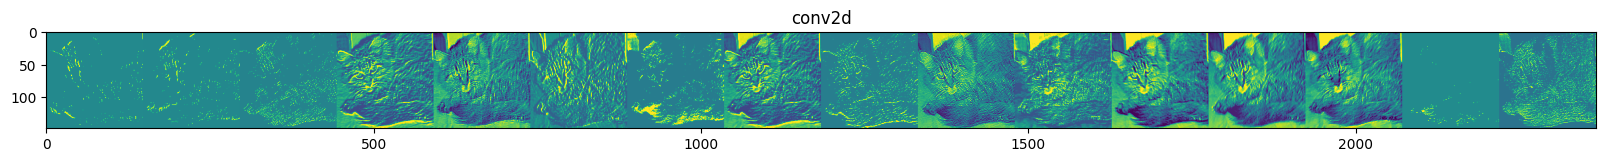

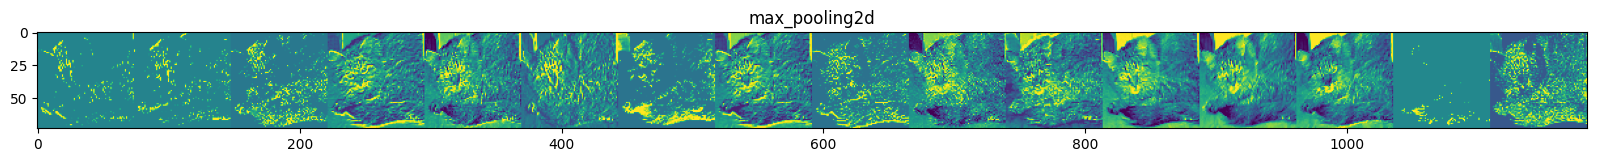

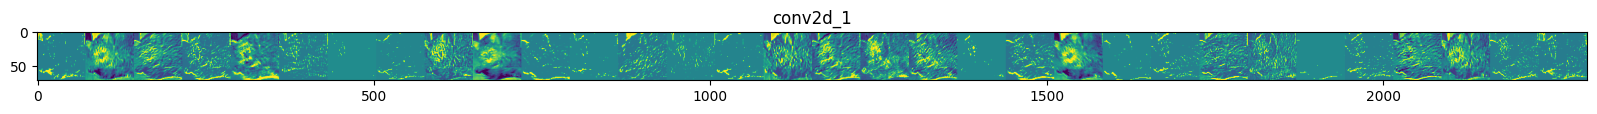

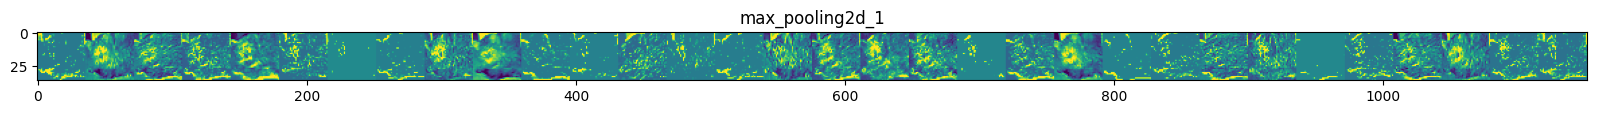

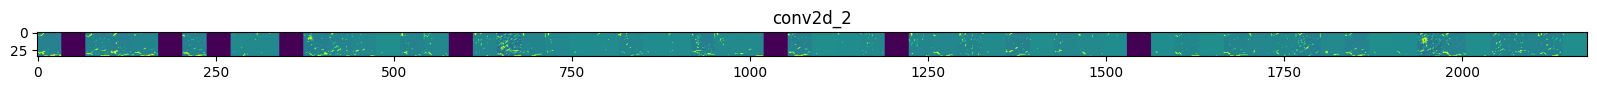

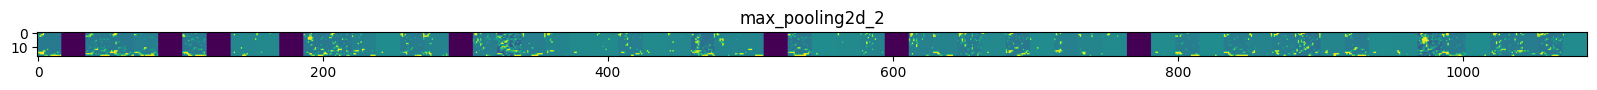

In [19]:
import numpy as np
import random
from keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid.

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called _representation sparsity_ and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

### Evaluating Accuracy and Loss for the Model

You will plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

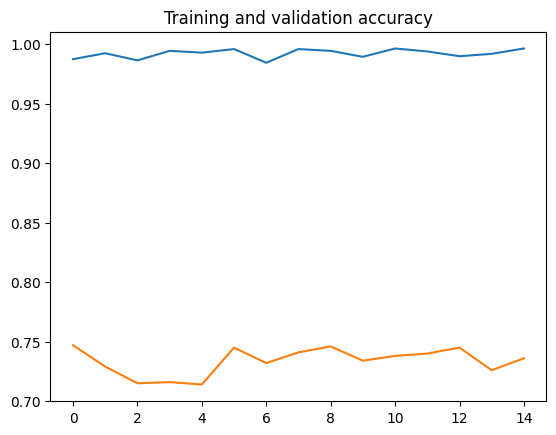

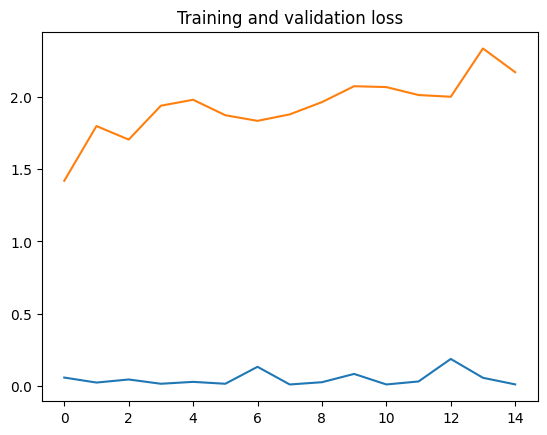

In [20]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )